# Video Games With Ratings

- 데이터 셋 : https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
- 게임이 가진 여러 변수를 통해 판매액을 분석하고자 하는 데이터 셋이다.
- 아웃라이어와 특정 게임이 가진 영향이 매우크기때문에 모델적용이 어려운데 모델을 만들어서 적용하기보다는 게임데이터에 관한 도메인지식과 양상을 습득하고자 한다.

## 라이브러리 설정 및 데이터 읽어들이기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

pd.set_option('display.max_columns', None)

In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


- Name : 게임의 이름
- Platform : 게임이 동작하는 콘솔
- Year_of_Release : 발매 년도
- Genre : 게임의 장르
- Publisher : 게임의 유통사
- NA_Sales : 북미 판매량 (Millions)
- EU_Sales : 유럽 연합 판매량 (Millions)
- JP_Sales : 일본 판매량 (Millions)
- Other_Sales : 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
- Global_Sales : 전세계 판매량
- Critic_Score : Metacritic 스태프 점수 (평균점수인듯 하다.)
- Critic_Count : Critic_Score에 사용된 점수의 수
- User_Score : Metacritic 구독자의 점수 (평균점수인듯 하다.)
- User_Count : User_Score에 사용된 점수의 수
- Developer : 게임의 개발사
- Rating: ESRB 등급 (19+, 17+, 등등)

## EDA 및 기초 통계 분석

In [4]:
# 결손 데이터 삭제

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df.dropna(inplace=True)
df.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3840,LEGO Jurassic World,WiiU,2015.0,Action,Warner Bros. Interactive Entertainment,0.27,0.19,0.02,0.04,0.52,71.0,5.0,8.1,14.0,TT Games,E10+
10027,Disney Art Academy,3DS,2016.0,Action,Nintendo,0.02,0.01,0.08,0.00,0.11,72.0,16.0,6.8,5.0,Headstrong Games,E
10579,The Whispered World,PC,2009.0,Adventure,Deep Silver,0.00,0.08,0.00,0.02,0.10,70.0,41.0,7.6,77.0,Daedalic Entertainment,E
2397,DiRT,X360,2007.0,Racing,Codemasters,0.38,0.40,0.00,0.09,0.87,83.0,59.0,7.4,94.0,Codemasters,E
6605,NASCAR 09,PS3,2008.0,Racing,Electronic Arts,0.22,0.01,0.00,0.02,0.25,65.0,22.0,7.5,10.0,EA Games,E
11070,Last Rebellion,PS3,2010.0,Role-Playing,Nippon Ichi Software,0.06,0.01,0.01,0.01,0.09,44.0,30.0,4.6,34.0,Hit Maker,T
11850,I-Ninja,XB,2003.0,Platform,Namco Bandai Games,0.05,0.02,0.00,0.00,0.07,75.0,18.0,8.4,8.0,Argonaut Games,T
6100,Shadow Hearts,PS2,2001.0,Role-Playing,Midway Games,0.09,0.07,0.10,0.02,0.28,73.0,24.0,8.8,55.0,Sacnoth,M
11918,Serious Sam: Next Encounter,PS2,2004.0,Shooter,Global Star,0.04,0.03,0.00,0.01,0.07,65.0,27.0,7.8,17.0,Climax Group,M
14040,Legasista,PS3,2012.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04,68.0,13.0,6.3,15.0,System Prisma,T


### 수치형 데이터 단순확인

In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

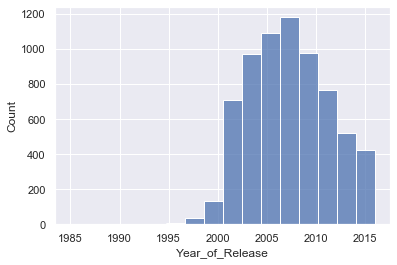

In [9]:
sns.histplot(data=df, x='Year_of_Release', bins=16)

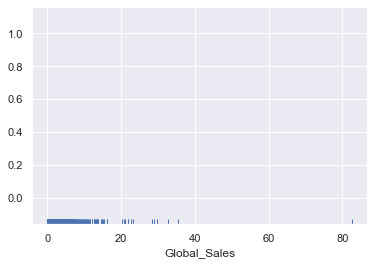

In [10]:
sns.rugplot(data=df, x='Global_Sales')

In [11]:
# 아웃라이어가 있는데 확인
df[df['Global_Sales'] > 60 ]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [12]:
df[df['Global_Sales'] > 30 ]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


- Wii Sports의 엄청난 성공을 확인할 수 있다.
- 정당한 데이터지만 데이터 분석에서 머신러닝의 학습을 뛰어넘는 수치이기에 제거한다.

In [13]:
gs1 = df['Global_Sales'].quantile(0.99)
gs2 = df['Global_Sales'].quantile(0.01)
print(gs1, gs2)

7.167600000000002 0.01


In [14]:
# 하위 1%경우 아웃라이어는 없다고 예측 가능. 상위 1%만 제거해준다.
df= df[df['Global_Sales'] < gs1 ]

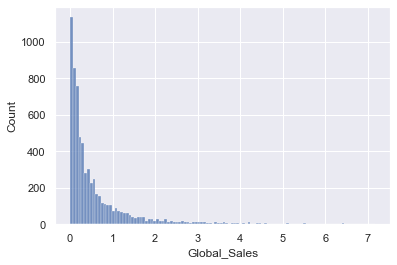

In [17]:
sns.histplot(data=df, x='Global_Sales')

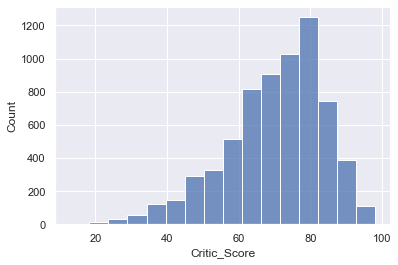

In [19]:
sns.histplot(data=df, x='Critic_Score', bins=16)

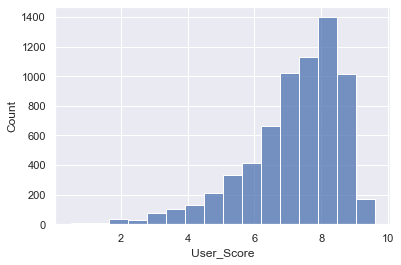

In [21]:
sns.histplot(data=df['User_Score'].apply(float), bins=16)

# string타입이 있어 float타입으로 모두 바꾸어 표시.

- 평론가 보다는 유저들이 점수를 상대적으로 조금 후하게 주는 편이다.
- 두 플롯의 모양이 비슷하고 평균은 각각 80, 8 점대에 머무르며 그 이후 급격히 줄어든다.

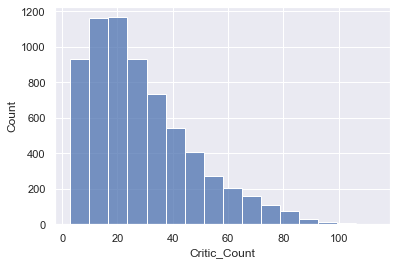

In [22]:
sns.histplot(data=df, x='Critic_Count', bins=16)

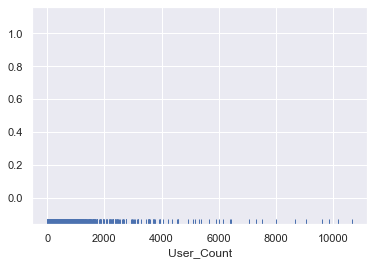

In [24]:
sns.rugplot(data=df, x='User_Count')

# 범위가 방대하고 들쭉날쭉이다. 잘라내기가 필요.

In [29]:
uc1 = df['User_Count'].quantile(0.96)
uc1

908.8000000000002

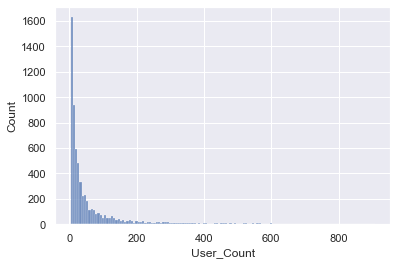

In [30]:
df = df[df['User_Count'] < uc1]
sns.histplot(data=df, x='User_Count')

### 수치형 데이터 관계확인

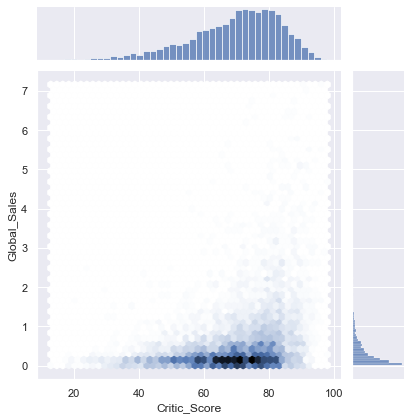

In [34]:
# 판매액과 상관있을 것 같은 변수들을 jointplot으로 함께 가시화 (평론가 점수와 유저점수와 같은)

sns.jointplot(data=df, x='Critic_Score', y='Global_Sales', kind='hex')

In [36]:
df['User_Score'] = df['User_Score'].apply(float)

C:\Users\dissi\anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


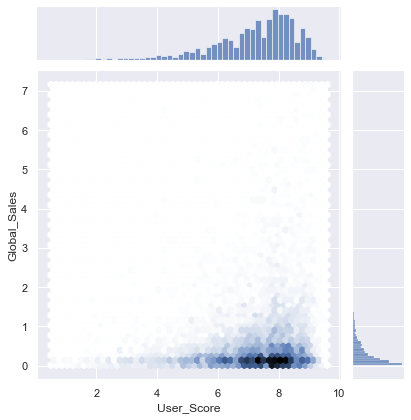

In [37]:
sns.jointplot(data=df, x='User_Score', y='Global_Sales', kind='hex')

- 유저점수나 평론가 점수가 판매를 보장하지는 못하지만 상관성은 분명히 있음. (몇가지 아웃라이어가 존재)
- 판매 자체가 저조한것이 디폴트.
- 유저점수 경우 평론가 점수보다 후한 경우가 많아서 상관성이 더 떨어져 보일 수 있다.

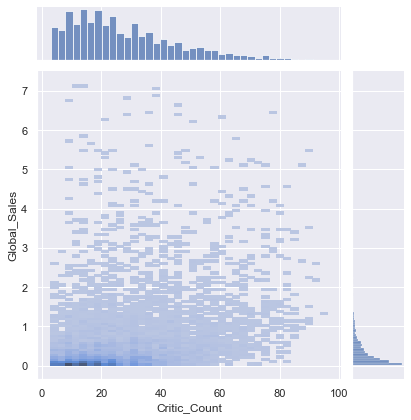

In [38]:
sns.jointplot(data=df, x='Critic_Count', y='Global_Sales' ,kind='hist')

- 대부분 20미만으로 평론가가 투입되는데 20미만의 경우 이상보다 저조한 판매게임이 많다.
- 20명 이상의 평론가가 투입되는 데이터의 경우 판매액이 나름 고르게 분포되는것을 확인할 수 있다.
- 20명 이상 평론가가 투입되는 게임의 경우 '기대작'이라고 분류한다면 비교적 높은 판매액 또는 판매액이 고르게 분포된 데이터가 나오는것으로 예측해볼 수 있다.

- 평론가가아닌 User Count 같은 경우 Sales와 큰 상관관계가 있기에 변수로 적합한지 고려해볼 필요가 있다. (많이 판매되었기에 점수 평가에 많이 참여할 수 있기 때문.)

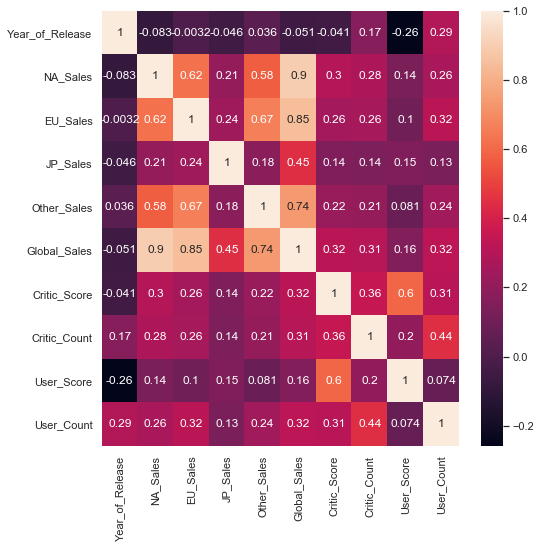

In [62]:
#### 수치형 데이터 간 관계 확인
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)

- 다른 곳의 sales 액수가 모여 global sales가 되기에 사실 상관성이 높음. 그중에서도 북미판매액이 가장 많은 영향을 미침.
- User_Count도 마찬가지이다. Count가 많을수록 많이 사서 플레이를 했다는 증거이기 때문이다.
- Critic_Score, Critic_Count는 0.3으로 비슷하게 영향을 미친다. 공신력, 기대작으로 이해하면 좋을 듯 하다.
- Critic_Score와 User_Score간 상관관계도 주목할만하다. 평론가의 영향인지 사람의 평가가 비슷한건지는 더욱 분석할 여지가 있다.
- 최근 발매된 게임일수록 점수가 박하게 받는 양상이 있다. (-0.26)

### 범주형 데이터 확인

In [40]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

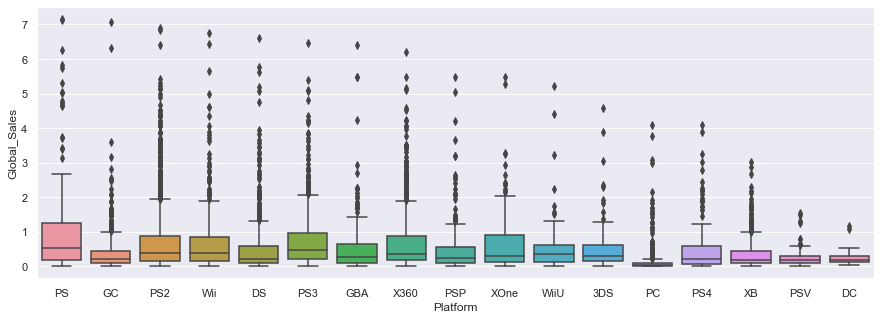

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='Platform',y='Global_Sales')
plt.show()

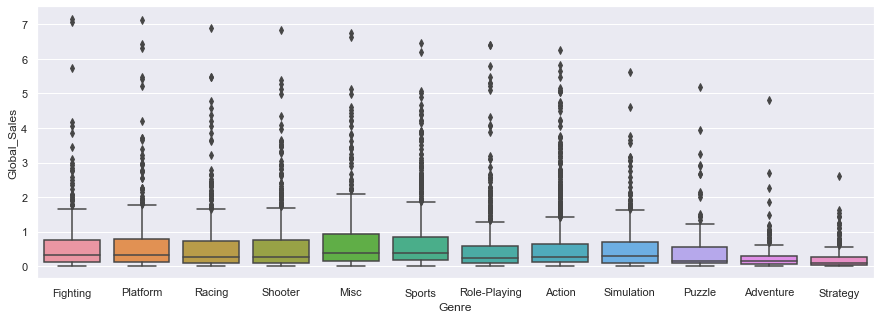

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='Genre',y='Global_Sales')
plt.show()

- 전체적으로 비슷하나 어드벤쳐와 전략물, 롤플레잉 장르의 판매가 저조하다. 스포츠와 특정플랫폼장르의 게임이 판매가 살짝 앞서고 있다.
- Publisher 와 Developer 변수는 숫자가 워낙 많아 가시화 제외.

In [53]:
# 평론가 점수와 유저 점수를 같이 살피기 위해 합쳐준다.

critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score' : 'Score'}, axis=1, inplace=True)
critic_score['ScoreBy'] = 'Critics'

user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score' : 'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'

scores = pd.concat([critic_score, user_score])
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


### 범주형 데이터 관계확인

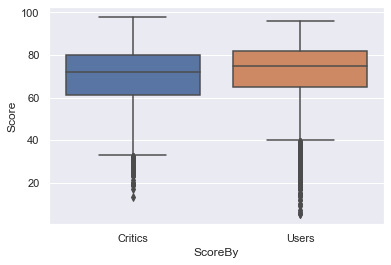

In [54]:
sns.boxplot(data=scores, x='ScoreBy', y='Score')

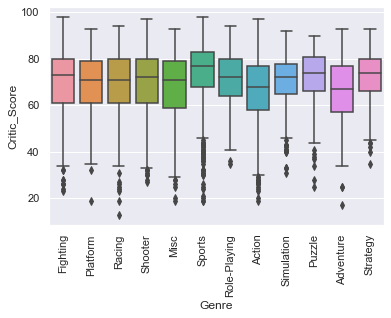

In [55]:
sns. boxplot(data=df, x='Genre', y='Critic_Score')
plt.xticks(rotation=90)
plt.show()

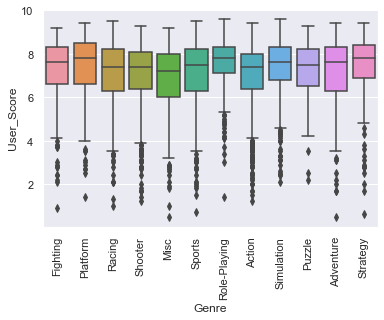

In [56]:
sns. boxplot(data=df, x='Genre', y='User_Score')
plt.xticks(rotation=90)
plt.show()

- 평론가 그룹은 스포츠에 점수를 후하게 주는편이고 액션, 어드벤쳐 장르에는 박하게 주는 편이다.
- 유저는 평론가 그룹과 다르게 어드벤쳐, 롤플레잉, 플랫폼 장르가 앞서고 있으며 액션과 슈팅게임은 저조하게 주는 양상을 보이고 있다.
- 퍼즐과 전략 장르 게임이 동시에 높다는것은 주목할 만하다. 판매액은 절대적인 수치대비 낮은 수준이지만.

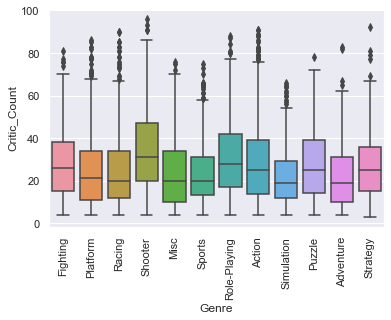

In [58]:
sns.boxplot(data=df, x='Genre', y='Critic_Count')
plt.xticks(rotation=90)
plt.show()

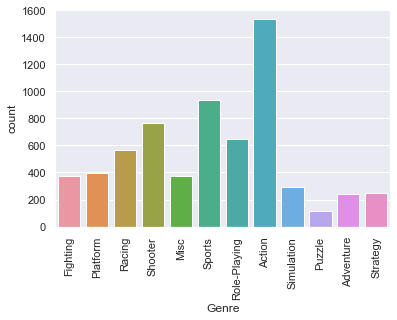

In [61]:
sns.countplot(data=df, x='Genre')
plt.xticks(rotation=90)
plt.show()

- 앞서 말했듯 평론가 참여가 많을 수록 사전기대지수가 높다고 예상해볼 수 있는데 슈팅-롤플레잉 우세가 주목할만하다.
- 동시에 판매액이 절대적으로 적은 퍼즐과 전략 장르의 게임(애초에 출시도 상대적으로 적음)의 평론가 참여가 높은데 이 역시 주목할만하다.

## 전처리

### 범주형 데이터 전처리

In [63]:
# Publisher 와 Developer 범주가 많아 끊어주어야 분석에 용이
pb = df['Publisher'].value_counts()
pb

Electronic Arts                902
Ubisoft                        468
Activision                     458
THQ                            301
Sony Computer Entertainment    287
                              ... 
Hudson Entertainment             1
Phantom EFX                      1
RTL                              1
Illusion Softworks               1
Sunsoft                          1
Name: Publisher, Length: 253, dtype: int64

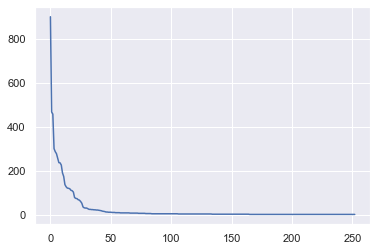

In [64]:
plt.plot(range(len(pb)), pb)

C:\Users\dissi\anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


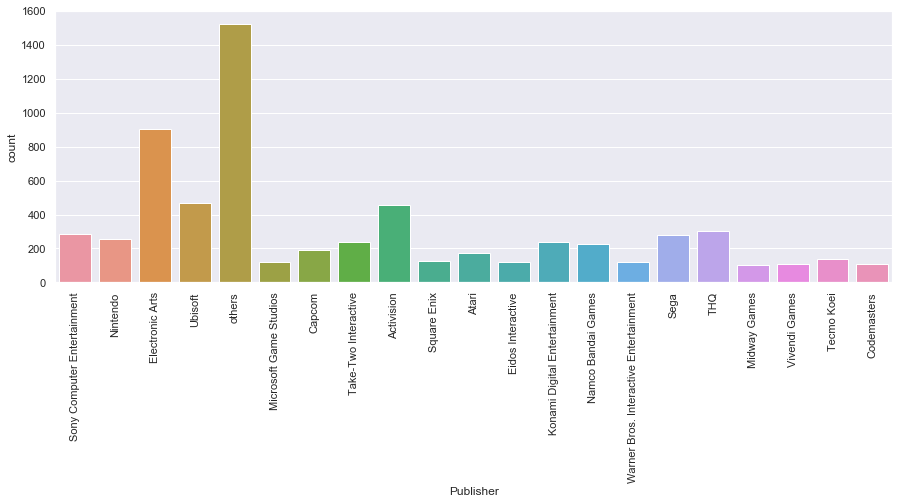

In [66]:
df['Publisher'] = df['Publisher'].apply(lambda s : s if s not in pb[20:] else 'others')

plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Publisher')
plt.xticks(rotation=90)
plt.show()

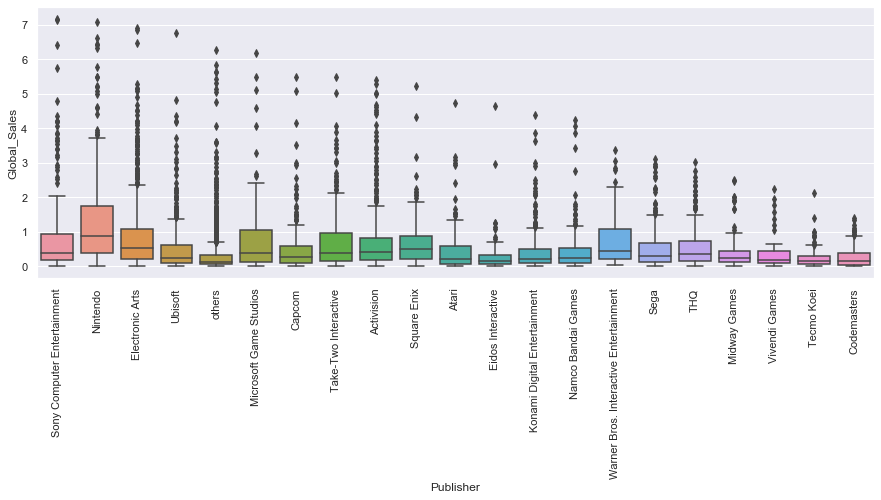

In [67]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='Publisher',y='Global_Sales')
plt.xticks(rotation=90)
plt.show()

- 닌텐도 압도적. 다음으로 EA(스포츠게임), 워너브라더스, 마이크로스프트 순
- 퍼블리셔 별로 어떤 장르를 출시하는지 분석하는것도 의미있을 듯 보임.

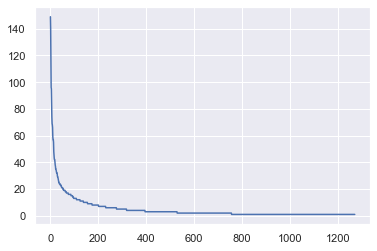

In [68]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)), dev)

C:\Users\dissi\anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


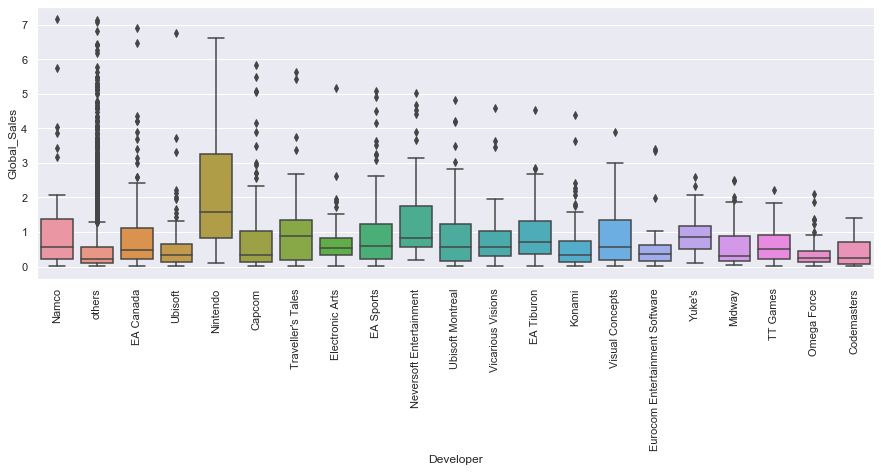

In [69]:
df['Developer'] = df['Developer'].apply(lambda s : s if s not in dev[20:] else 'others')

plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='Developer', y='Global_Sales')
plt.xticks(rotation=90)
plt.show()

- 닌텐도 유통도 하지만 개발도 한다. 네버소프트, 비쥬얼컨셉, EA 순

In [70]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [72]:
X_cat = df[['Platform', 'Genre', 'Publisher', 'Developer']]
X_cat = pd.get_dummies(X_cat, drop_first=True)

### 수치형 데이터 전처리

In [71]:
from sklearn.preprocessing import StandardScaler

X_num = df[['Year_of_Release', 'Critic_Score','Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

- User_Count, User_Score 경우 각각 Sales와 Critic_Score 에 영향을 받았다고 예측할 수 있기에 drop시킴.

In [73]:
X = pd.concat([X_cat, X_scaled], axis=1)
y = df['Global_Sales']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 모델 학습 및 평가

#### XGBoost Regression

In [75]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 평가

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE: 0.40108377501848275
XGB RMSE: 0.7042519240022177
LR MAE: 0.4393590163959862
LR RMSE: 0.6921270249386282


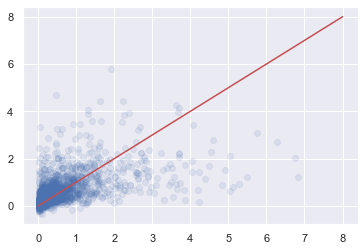

In [80]:
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0, 8], [0,8], '-r')

- 적게 팔린 게임은 overestimate 많이 팔린 게임은 오히려 underestimate 하는 경향이 나타난다.
- 일단 판매액이 일반적으로 적다보니 적은판매액의 데이터에 집중하게되어 높은 판매액 데이터는 오류가 나고 있다.
- 또한 판매액 높은 게임은 아웃라이어이다.

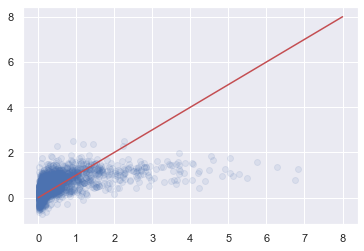

In [81]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 8], [0,8], '-r')

- 가중치 설정으로 음수가 나오는 경우가 생긴다.

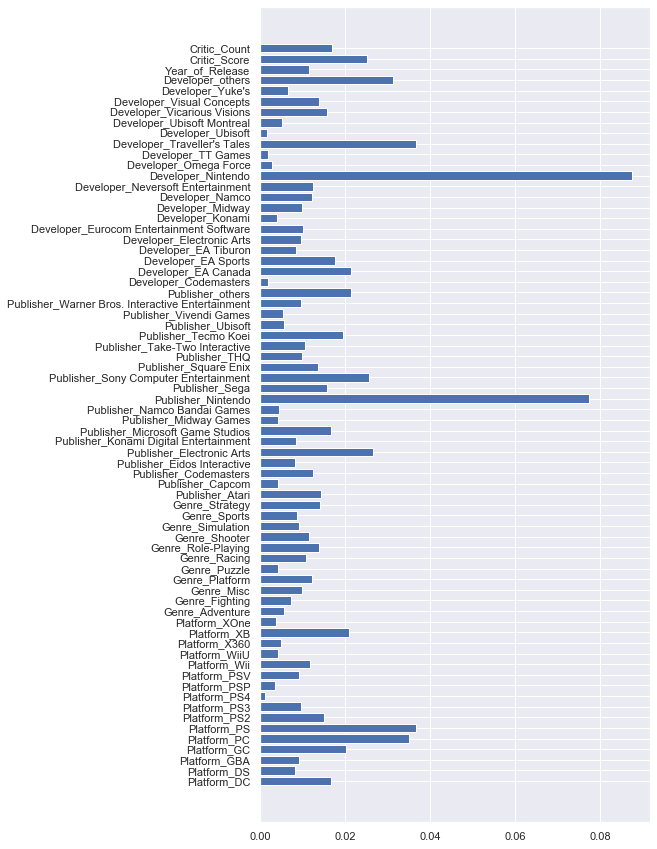

In [84]:
plt.figure(figsize=(7, 15))
plt.barh(X.columns, model_xgb.feature_importances_)
plt.show()